In [1]:
import csv
dates = []
levels = []
values = csv.reader(open('CO-OPS__8729108__wl.csv'),delimiter = ',')
for row in values:
    dates.append(row[0])
    levels.append(row[1])
print(max(levels))
Max_index = levels.index(max(levels))
print(dates[Max_index])

6.647
10/10/2018 18:06


In [36]:
import pandas as pd
data = pd.read_csv('CO-OPS__8729108__wl.csv',sep = ',')
Max = data[" Water Level"].max() # note the space before column label
print(Max)
time = data["Date Time"].where(data[" Water Level"] == Max).dropna().values[0]
print(time)

6.647
10/10/2018 18:06


In [1]:
import csv
dates = []
levels = []
values = csv.reader(open('CO-OPS__8729108__wl.csv'),delimiter = ',')
for row in values:
    dates.append(row[0])
    levels.append(row[1])
i = 0
rises = [-999] # I used -999 as an null indicator, whose type is int instead of string
nlst = levels[1:]
while i < len(nlst)-1:
    try:
        early = float(nlst[i])
        late =  float(nlst[i+1])
        rise = late - early
        rises.append(rise)
        i=i+1
    except:
        if nlst[i+1]== '': # there is one empty cell in data file
            rises.extend([-999,-999])
            i=i+2
            continue
Max_index = rises.index(max(rises))
print(round(max(rises),3))
print(dates[Max_index], levels[Max_index])
print(dates[Max_index+1], levels[Max_index+1])

0.64
10/10/2018 17:36 4.951
10/10/2018 17:42 5.591


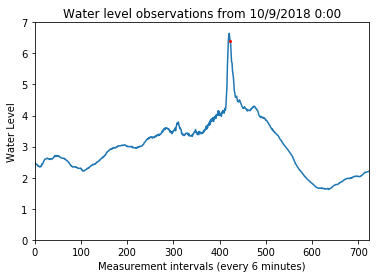

In [110]:
import matplotlib
import matplotlib.pyplot as plt
import csv
levels = []
values = csv.reader(open('CO-OPS__8729108__wl.csv'),delimiter = ',')
for row in values:
    levels.append(row[1])
nlst = levels[1:]
empty = nlst.index('')
nlst[empty] = 0
nlst2 = []
for num in nlst:
    nlst2.append(float(num))
nlst2[empty] = (nlst2[empty-1] + nlst2[empty+1])/2 # impute missing value
plt.plot(nlst2[:])
plt.axis([0,724,0,7])
plt.plot(empty, nlst2[empty], 'ro',markersize = 2) # mark the missing point
plt.xlabel("Measurement intervals (every 6 minutes)")
plt.ylabel('Water Level')
plt.title('Water level observations from 10/9/2018 0:00')
plt.show()

In [28]:
import datetime
import urllib.request
now = datetime.datetime.now().strftime("%Y%m%d")
url='https://tidesandcurrents.noaa.gov/api/datagetter?begin_date='+now+'%2000:00&end_date='+now+'&station=8729108&product=water_level&datum=mllw&units=metric&time_zone=lst&application=web_services&format=csv'
data = urllib.request.urlopen(url)
datatowrite = data.read()
with open('Downloads/CO-OPS__8729108__wl.csv','wb') as file:  
    file.write(datatowrite)
print('Water level data file has been downloaded for ',now,', which can also be viewed in ',url[:-3]+'xml',sep='')

Water level data file has been downloaded for 20181016, which can also be viewed in https://tidesandcurrents.noaa.gov/api/datagetter?begin_date=20181016%2000:00&end_date=20181016&station=8729108&product=water_level&datum=mllw&units=metric&time_zone=lst&application=web_services&format=xml
